# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

sal = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
sal.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
Name                 33183 non-null object
Job Titles           33183 non-null object
Department           33183 non-null object
Full or Part-Time    33183 non-null object
Salary or Hourly     33183 non-null object
Typical Hours        8022 non-null float64
Annual Salary        25161 non-null float64
Hourly Rate          8022 non-null float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
# Your code here:
sal["Salary or Hourly"].value_counts()


Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
# Your code here:
sal.groupby("Department").count()["Name"].sort_values()

Department
LICENSE APPL COMM            1
POLICE BOARD                 2
BOARD OF ETHICS              8
HUMAN RELATIONS             16
TREASURER                   22
DISABILITIES                28
ADMIN HEARNG                39
BUDGET & MGMT               46
CULTURAL AFFAIRS            65
HUMAN RESOURCES             79
ANIMAL CONTRL               81
CITY CLERK                  84
MAYOR'S OFFICE              85
INSPECTOR GEN               87
PROCUREMENT                 92
DoIT                        99
BOARD OF ELECTION          107
COPA                       116
BUSINESS AFFAIRS           171
COMMUNITY DEVELOPMENT      207
BUILDINGS                  269
LAW                        407
CITY COUNCIL               411
HEALTH                     488
FINANCE                    560
FAMILY & SUPPORT           615
GENERAL SERVICES           980
PUBLIC LIBRARY            1015
TRANSPORTN                1140
AVIATION                  1629
WATER MGMNT               1879
OEMC                      21

In [21]:
sal_h = sal.loc[sal["Hourly Rate"].notnull()].sample(40, random_state=1)
sal_h.head()

13.94

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

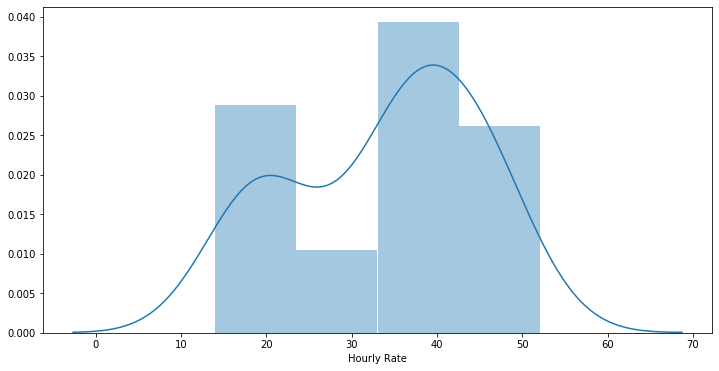

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.distplot(sal_h["Hourly Rate"])

In [27]:
# Your code here:
# null hypothesis $30/hr
# alternative hypothesis <> $30/hr
from scipy.stats import ttest_1samp
hours = sal_h["Hourly Rate"].tolist()
x = sal_h["Hourly Rate"].mean() # 32.78855771628024
test_result = ttest_1samp(hours, 30)
display(test_result.statistic)
display(test_result.pvalue / 2)
# Since P value is lower that 0.05 we reject Ho

2.221846216463578

0.016082871507377052

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

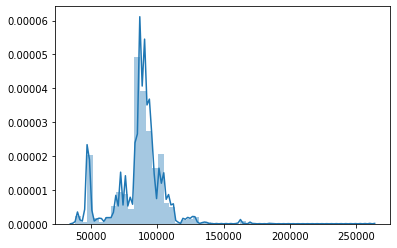

In [49]:
sns.distplot(sal_p["Annual Salary"].tolist())

In [55]:
# Your code here:
sal_p = sal.loc[(sal["Department"] == "POLICE") & (sal["Salary or Hourly"] == "Salary")]
sal_p["Annual Salary"].mean() # mean 86486.41450313339
# null hypothesis -> mean annual salary > 86.000
# alt hypoythesis -> mean annual salary <= 86.000
police =  sal_p["Annual Salary"].sample(n=40, random_state=1)
test_result2 = ttest_1samp(police, 86000)
display(test_result2.statistic)
display(test_result2.pvalue / 2)


0.9047271336437399

0.18558258950565437

Using the `crosstab` function, find the department that has the most hourly workers. 

In [66]:
# Your code here:
sal_cross = pd.crosstab(sal["Department"], sal["Salary or Hourly"], margins=True, margins_name="Total")
sal_cross.sort_values(by=["Hourly"], ascending=False).head()

Salary or Hourly,Hourly,Salary,Total
Department,,,
Total,8022,25161,33183
STREETS & SAN,1862,336,2198
WATER MGMNT,1513,366,1879
OEMC,1273,829,2102
AVIATION,1082,547,1629


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

48.08962554029542

1.2307678041416596e-36

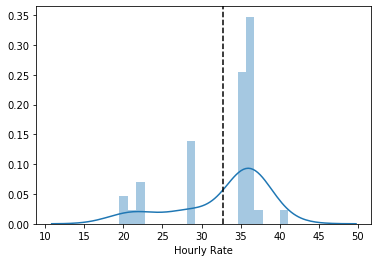

In [94]:
# Your code here:
ssan = sal.loc[(sal["Department"] == "STREETS & SAN") & (sal["Salary or Hourly"] == "Hourly")]
ssan["Hourly Rate"].mean() # 33.72837808807734
# null hypothesis -> hourly wage >= $35/hour
# alt hypothesis -> hourly wage < $35/hour
ssan.head()
ssan_sample = ssan["Hourly Rate"].sample(40, random_state=1)
ax = sns.distplot(ssan_sample, bins=20)
ax.axvline(np.mean(ssan_sample), color="k",ls="dashed")
test_result3 = ttest_1samp(police, 35)
display(test_result3.statistic)
display(test_result3.pvalue / 2)

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [48]:
from scipy.stats import 
sample = sal_h["Hourly Rate"].sample(30, random_state=1)
sample_mean = np.mean(sample)
sample_mean # 34.02433333333334
test = ttest_1samp(sample, sample_mean)
display(test.statistic)
display(test.pvalue)

0.0

1.0

In [51]:
# Your code here:
import numpy as np
import scipy.stats

sample = sal_h["Hourly Rate"].sample(30, random_state=1)

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

tmean, tmeanless, tmeanmore = mean_confidence_interval(sample, confidence=0.95)
print(tmean, tmeanless, tmeanmore)

34.02433333333334 30.009145476342336 38.039521190324336


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [59]:
# Your code here:
import numpy as np
import scipy.stats

sal_p = sal.loc[(sal["Department"] == "POLICE") & (sal["Salary or Hourly"] == "Salary")]["Annual Salary"]
police_sample = sal_p.sample(30, random_state=1)

police_sample.head()

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

tmean, tmeanless, tmeanmore = mean_confidence_interval(police_sample, confidence=0.95)
print(tmean, tmeanless, tmeanmore)

86590.4 81819.68633441359 91361.1136655864


# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [13]:
# Your code here:
